# Explore here

### Paso 1: Planteamiento del problema y recopilacion de datos

In [1]:
import pandas as pd

df = pd.read_csv('https://breathecode.herokuapp.com/asset/internal-link?id=809&path=housing.csv')
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


### Paso 2: Exploracion y limpieza de datos

In [2]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Tenemos todas categorias numericas, no tenemos datos nulos.

In [3]:
df.duplicated().sum()

np.int64(0)

Tampoco hay datos duplicados.

### Paso 3: Analisis de variables univariantes

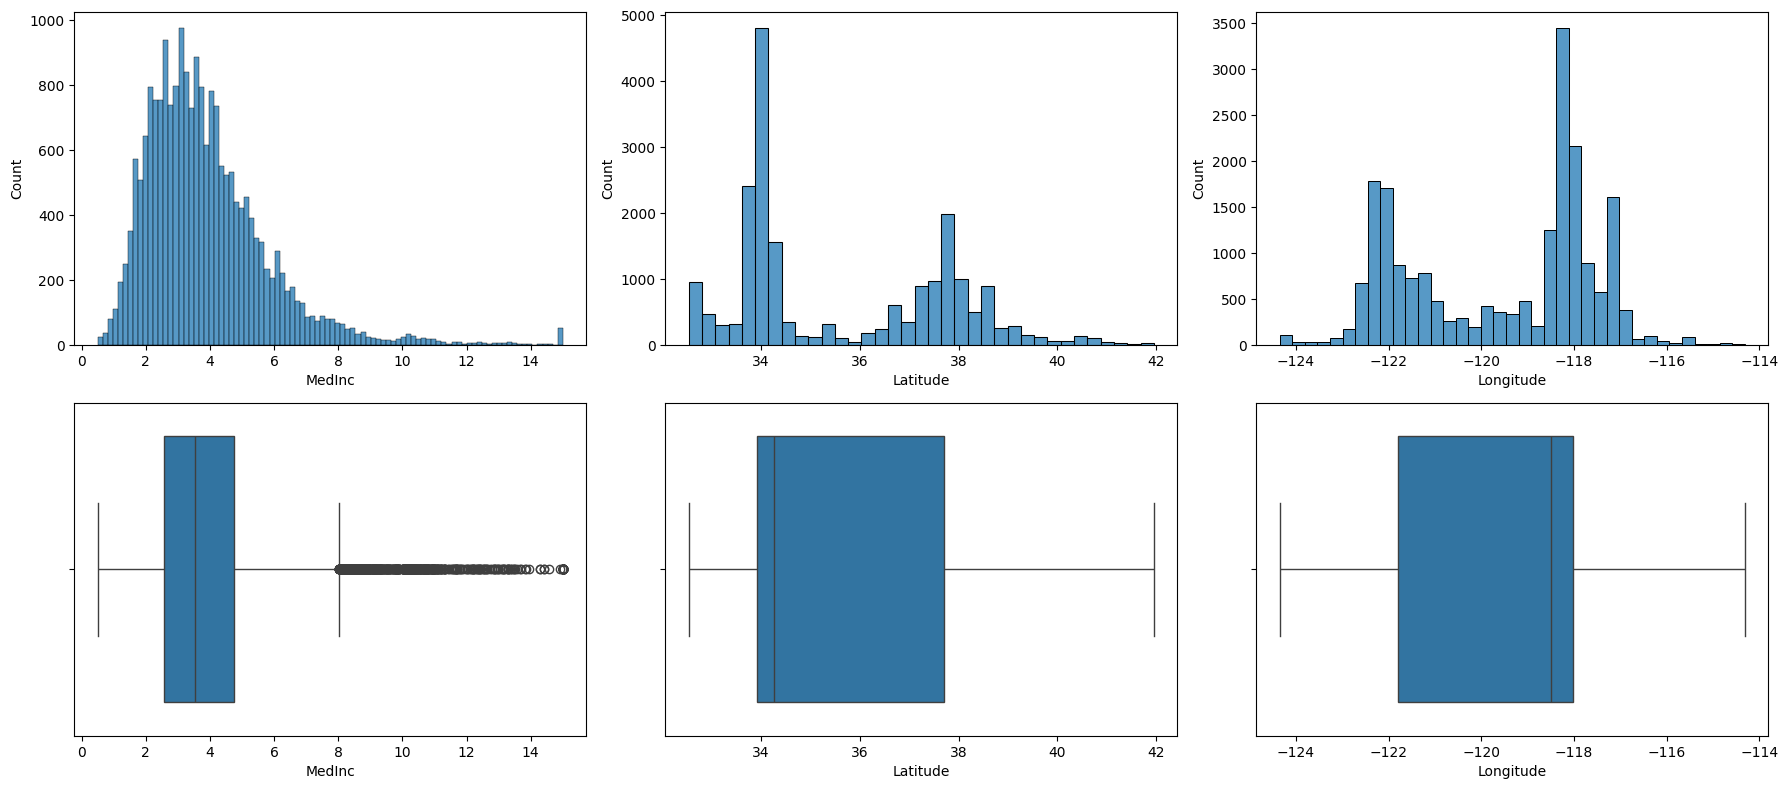

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2,3, figsize=(18,8))

sns.histplot(ax=axis[0,0], data =df, x= 'MedInc')
sns.boxplot(ax=axis[1,0], data =df, x= 'MedInc')
sns.histplot(ax=axis[0,1], data =df, x= 'Latitude')
sns.boxplot(ax=axis[1,1], data =df, x= 'Latitude')
sns.histplot(ax=axis[0,2], data =df, x= "Longitude")
sns.boxplot(ax=axis[1,2], data =df, x= "Longitude")

plt.tight_layout()
plt.show()

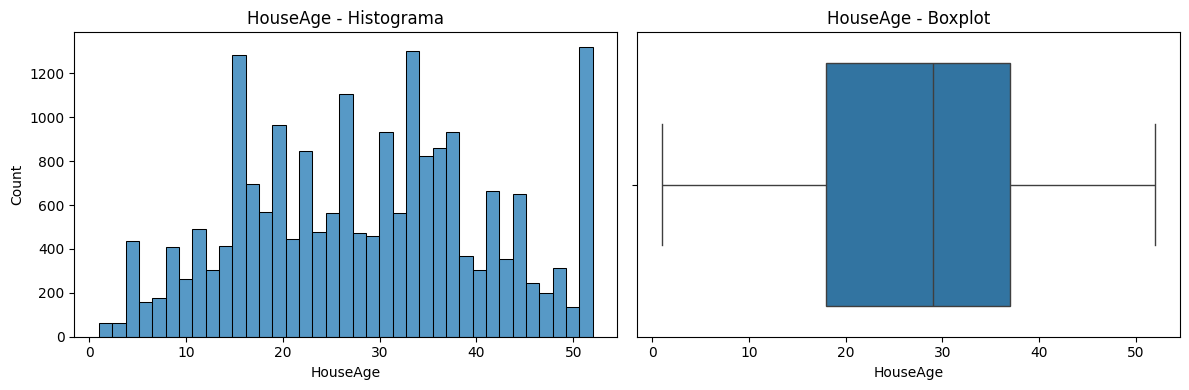

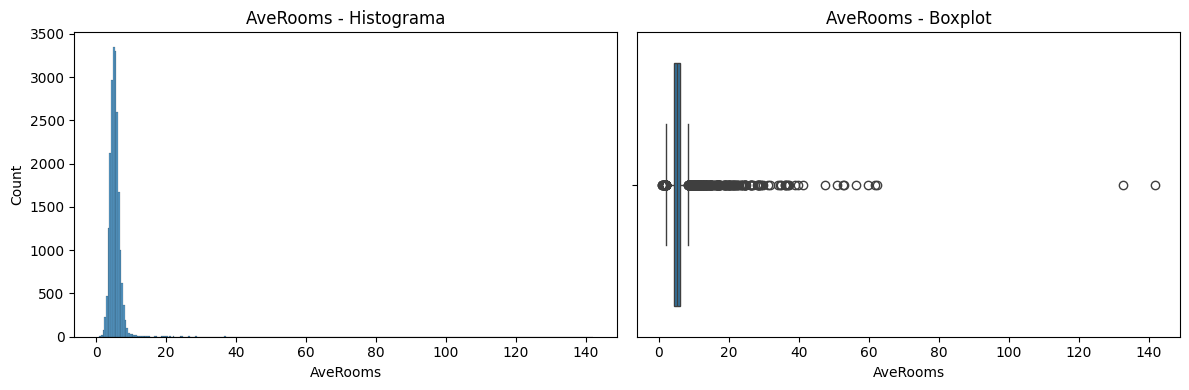

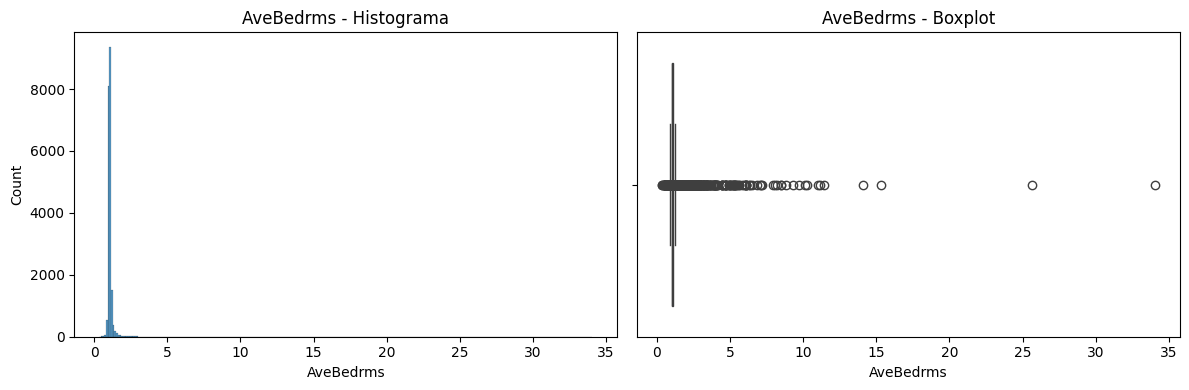

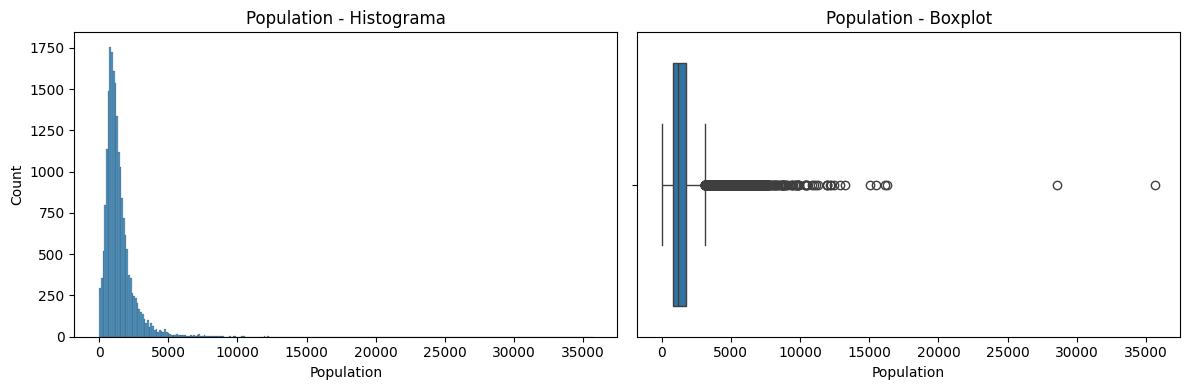

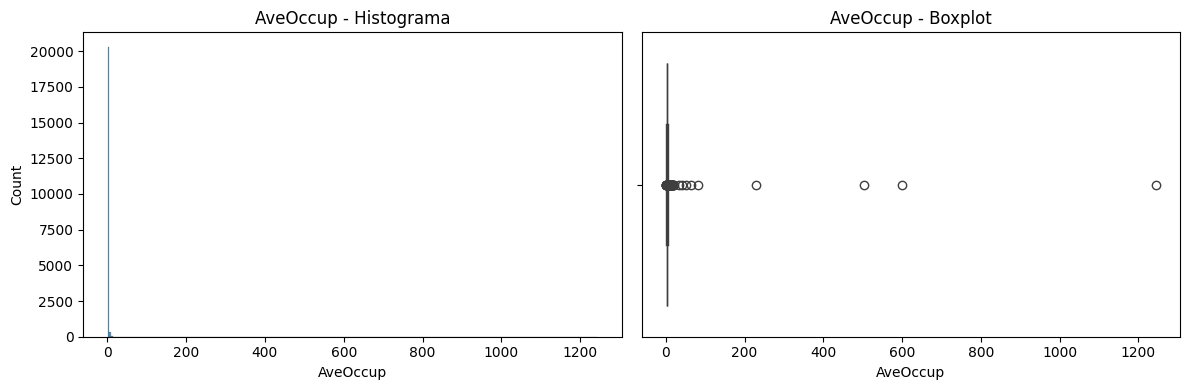

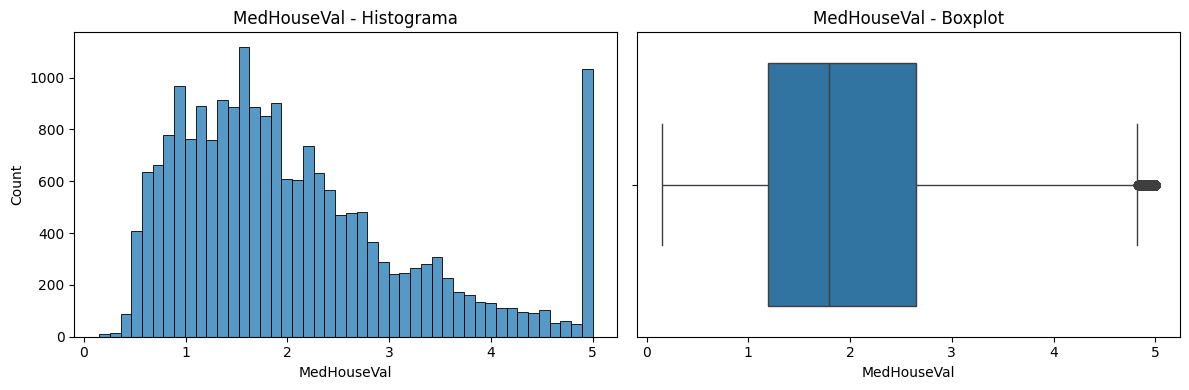

In [5]:
cols = ['HouseAge', 'AveRooms', 'AveBedrms','Population','AveOccup','MedHouseVal']

for col in cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    
    sns.histplot(df[col], ax=axes[0])
    axes[0].set_title(col + ' - Histograma')
    

    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(col + ' - Boxplot')
    
    plt.tight_layout()
    plt.show()

Variables como AveRooms, AveBedrms y AveOccup tienen outliers masivo.

### Paso 4: Analisis de variables multivariante

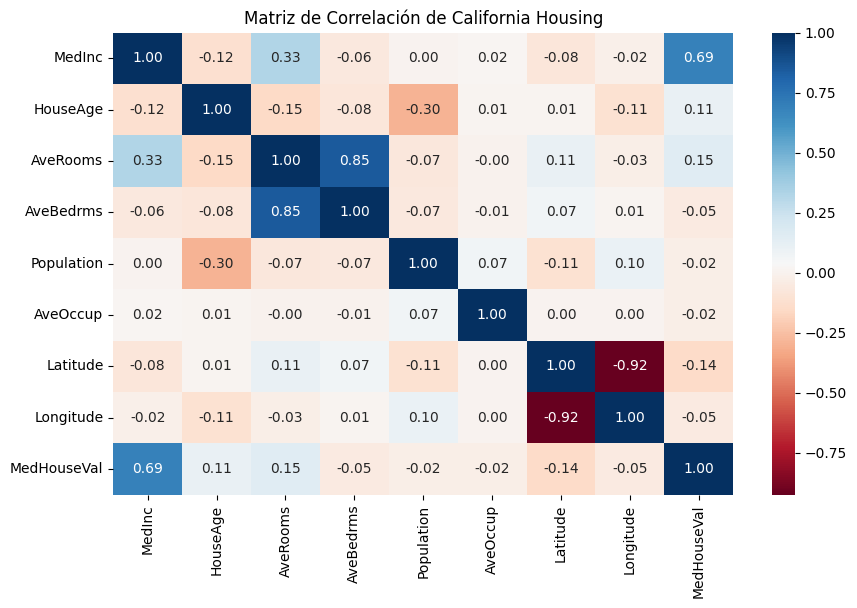

In [6]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='RdBu', fmt='.2f')
plt.title('Matriz de Correlación de California Housing')
plt.show()


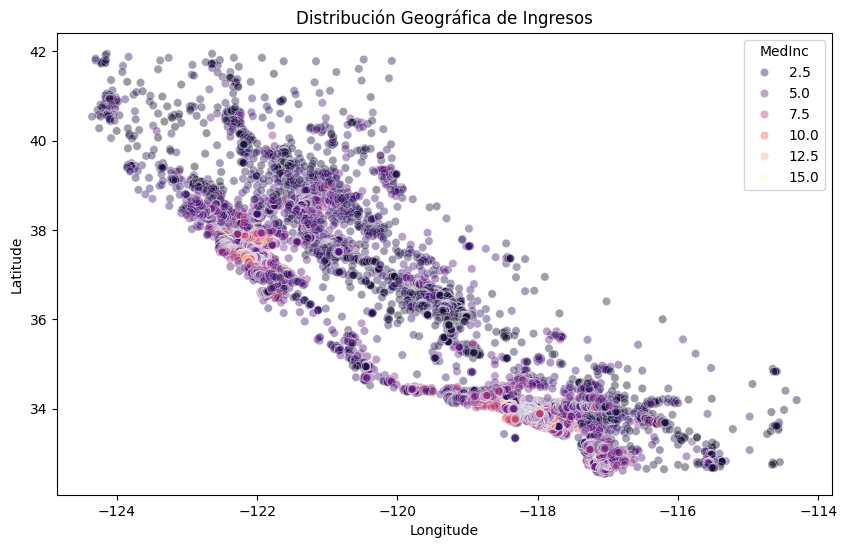

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='MedInc', palette='magma', alpha=0.4)
plt.title('Distribución Geográfica de Ingresos')
plt.show()

### Paso 5: Ingenieria de caracteristicas

In [8]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [9]:
df_clean = df[
    (df['AveOccup'] < 50) & 
    (df['AveRooms'] < 30) & 
    (df['AveBedrms'] < 10)  
    
]

print(f"Filas eliminadas: {len(df) - len(df_clean)}")

Filas eliminadas: 31


Eliminamos los outliers masivos como que hayan mas de 50 personas por casa, tambien mas de 30 habitaciones o mas de 10 dormitorios, son valores muy atipicos.

In [10]:
df_clean.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20609.000000,20609.000000,20609.000000,20609.000000,20609.000000,20609.000000,20609.000000,20609.000000,20609.000000
mean,3.870972,28.650201,5.375638,1.085439,1425.641370,2.938025,35.628522,-119.569491,2.069013
std,1.899886,12.583991,1.676107,0.263622,1129.261678,0.942699,2.134505,2.004160,1.154062
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563900,18.000000,4.439528,1.006012,788.000000,2.430481,33.930000,-121.800000,1.197000
50%,3.534900,29.000000,5.227068,1.048679,1167.000000,2.818882,34.250000,-118.490000,1.798000
75%,4.743700,37.000000,6.048421,1.099202,1725.000000,3.282270,37.710000,-118.010000,2.649000
max,15.000100,52.000000,29.852941,6.500000,35682.000000,41.214286,41.950000,-114.310000,5.000010


### Construimos un K-Means

In [11]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=6, random_state=42)

model.fit(df_clean)

df_clean['cluster'] = model.predict(df_clean)
df_clean

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,cluster
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,1
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,1
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,1
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,1
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,1
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,1
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,1
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,1


In [12]:
model.cluster_centers_

array([[ 3.76041732e+00,  2.38408399e+01,  5.09757870e+00,
         1.06495033e+00,  2.29086519e+03,  3.15384662e+00,
         3.52901248e+01, -1.19291847e+02,  2.01030184e+00],
       [ 3.95770951e+00,  3.18564782e+01,  5.61643350e+00,
         1.11544876e+00,  6.71190289e+02,  2.75761153e+00,
         3.59229718e+01, -1.19800725e+02,  2.12904576e+00],
       [ 3.90493851e+00,  1.89433040e+01,  5.16909455e+00,
         1.07029891e+00,  3.85670381e+03,  3.30528552e+00,
         3.51471261e+01, -1.19102717e+02,  2.00966888e+00],
       [ 3.80639922e+00,  2.89941437e+01,  5.25150027e+00,
         1.06380958e+00,  1.36427889e+03,  2.98356629e+00,
         3.55299727e+01, -1.19514521e+02,  2.03780088e+00],
       [ 5.15299286e+00,  8.92857143e+00,  6.40358893e+00,
         1.06174100e+00,  1.61421429e+04,  3.63111187e+00,
         3.53085714e+01, -1.19475714e+02,  2.34435714e+00],
       [ 4.23341636e+00,  1.27045455e+01,  5.58531427e+00,
         1.07544185e+00,  7.14920909e+03,  3.245722

In [17]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

df_clean_pca = pca.fit_transform(df_clean.drop('cluster',axis=1))

df_clean_pca = pd.DataFrame(df_clean_pca,columns=['cp1','cp2','cp3'])
df_clean_pca

,cp1,cp2,cp3
0,-1103.677545,8.569441,3.011741
1,975.377514,-4.476931,3.641737
2,-929.715269,20.106206,3.121943
3,-867.715395,20.428686,3.051879
4,-860.715542,20.471370,3.148439
...,...,...,...
20604,-580.627004,-5.527397,3.806056
20605,-1069.600989,-14.201992,3.811287
20606,-418.601309,-12.986422,3.950158
20607,-684.603207,-12.880616,3.956607


In [18]:
centroides = pca.transform(model.cluster_centers_)

/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [20]:
!pip install plotly


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 37.8 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 444.0/444.0 kB 40.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 26.0.1
[notice] To update, run: pip install --upgrade pip


In [21]:
!pip install nbformat


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.8/390.8 kB 31.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 26.0.1
[notice] To update, run: pip install --upgrade pip


In [22]:
import plotly.express as px
df_clean_pca['cluster'] = df_clean['cluster']
print(df_clean_pca)
fig = px.scatter_3d(df_clean_pca, x='cp1', y='cp2', z='cp3',
              color='cluster')
fig.show()

               cp1        cp2       cp3  cluster
0     -1103.677545   8.569441  3.011741      1.0
1       975.377514  -4.476931  3.641737      0.0
2      -929.715269  20.106206  3.121943      1.0
3      -867.715395  20.428686  3.051879      1.0
4      -860.715542  20.471370  3.148439      1.0
...            ...        ...       ...      ...
20604  -580.627004  -5.527397  3.806056      2.0
20605 -1069.600989 -14.201992  3.811287      0.0
20606  -418.601309 -12.986422  3.950158      3.0
20607  -684.603207 -12.880616  3.956607      1.0
20608   -38.600061 -12.735390  3.998148      1.0

[20609 rows x 4 columns]


### Entrenamos un modelo de clasificación supervisada y predecimos con el conjunto de test
Elegimos el K-nearest neighbors

In [23]:
X = df_clean.drop('cluster',axis=1)
y = df_clean.cluster

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,train_size=0.8)

from sklearn.neighbors import KNeighborsClassifier

model_s = KNeighborsClassifier(n_neighbors=6)

model_s.fit(X_train,y_train)

y_pred = model_s.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred )

0.9985443959243085

### Guardamos el modelo

In [26]:
from pickle import dump

dump(model, open("../models/k-means_default_42", "wb"))
dump(model_s, open("../models/K-nearest_neighbors_6", "wb"))